In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import scipy
import scipy.signal

In [2]:
fs = 44100

In [3]:
t = np.arange(int(fs*2e-3))/fs

In [4]:
chirp = scipy.signal.chirp(t, 10e3, 2e-3, 20e3)

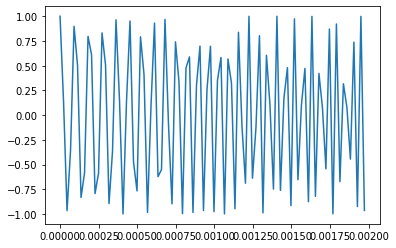

In [5]:
plt.plot(t, chirp)

In [5]:
import sonar
import queue
import math

In [6]:
def lcm(a, b):
    return abs(a*b) // math.gcd(a, b)

In [11]:
fs= 44100
f = 440;
duration = lcm(fs,f)
t = np.arange(duration)/fs/10
data =0.1* np.sin(2*np.pi*f*t)
#data = np.bartlett(len(data))*data
print('duration: ', duration/fs)

duration:  22.0


In [12]:

p = pyaudio.PyAudio() #instantiate PyAudio


In [13]:
def show_devices(audio):
    # audio = pyaudio.PyAudio()
    for i in range(audio.get_device_count()):
        print (i, audio.get_device_info_by_index(i))

In [14]:
show_devices(p)

0 {'index': 0, 'structVersion': 2, 'name': 'Display Audio', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.008854166666666666, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.0181875, 'defaultSampleRate': 48000.0}
1 {'index': 1, 'structVersion': 2, 'name': 'MacBook Air Microphone', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.04850340136054422, 'defaultLowOutputLatency': 0.01, 'defaultHighInputLatency': 0.05866213151927438, 'defaultHighOutputLatency': 0.1, 'defaultSampleRate': 44100.0}
2 {'index': 2, 'structVersion': 2, 'name': 'MacBook Air Speakers', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.02215419501133787, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.03231292517006803, 'defaultSampleRate': 44100.0}


In [15]:
out = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True,output_device_index=2)
for i in range(1):
    out.write( data.astype(np.float32).tobytes() )


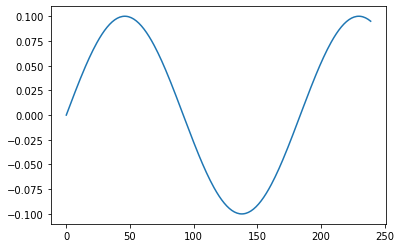

In [48]:
plt.plot(data)